In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.
You have been given a dataset named sales_data.csv that contains information about sales transactions. The dataset has columns date, product_id, quantity, and revenue. Write a Python script to read the dataset, manipulate the data to calculate the total revenue for each product, and then create a bar plot to visualize the top 10 products by revenue.

Dataset: https://drive.google.com/file/d/1myGZC6wzn5RlerjjmNG44YAqoPZ4P7tp/view?usp=sharing

Submission: Share the Notebook file(.ipynb or .py) or pdf along with code

Note: Submit GitHub File for the solution

In [19]:
# Readind data
df = pd.read_csv('sales_data.csv')
df

,date,product_id,quantity,revenue
0,2023-07-01,1001,10,100.0
1,2023-07-01,1002,5,75.0
2,2023-07-02,1001,8,80.0
3,2023-07-02,1003,3,45.0
4,2023-07-03,1002,12,180.0
5,2023-07-03,1003,6,90.0
6,2023-07-04,1001,15,150.0
7,2023-07-04,1002,7,105.0
8,2023-07-04,1003,9,135.0


In [20]:
df.product_id.unique()

array([1001, 1002, 1003], dtype=int64)

In [51]:
a = df.groupby('product_id').sum()  #Revenue by each product
a

,quantity,revenue
product_id,,
1001,33,330.0
1002,24,360.0
1003,18,270.0


In [52]:
data = a.sort_values('revenue',ascending=False).head(10)   #Top 10 and sorted
data

,quantity,revenue
product_id,,
1002,24,360.0
1001,33,330.0
1003,18,270.0


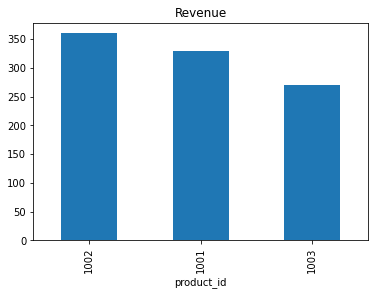

In [53]:
data['revenue'].plot.bar()     #Bar graph 
plt.title('Revenue')
plt.show()

## 2. 
**Context:** Say we have a table `salaries` with data on employee salary and department in the following format:

depname | empno | salary |

-----------+-------+--------+

develop | 11 | 5200 |

develop | 7 | 4200 |

develop | 9 | 4500 |

develop | 8 | 6000 |

develop | 10 | 5200 |

personnel | 5 | 3500 |

personnel | 2 | 3900 |

sales | 3 | 4800 |

sales | 1 | 5000 |

sales | 4 | 4800 |

Task: Write a query to get the `empno` with the highest salary

Submission: Share the image along with query or .sql file 

In [2]:
import mysql.connector as conn
mydb = conn.connect(host='localhost',user='root',passwd='0000')
cursor=mydb.cursor()

In [55]:
cursor.execute('create database ANSR')
cursor.execute('use ANSR')

In [58]:
cursor.execute('create table salaries(depname VARCHAR(20), empno INT(10), salary INT(10))')

In [59]:
#Adding values
cursor.execute("insert into salaries values('develop',11,5200)")    #this is the highest salary
cursor.execute("insert into salaries values('develop',7,4200)")
cursor.execute("insert into salaries values('sales',1,5000)")
cursor.execute("insert into salaries values('personnel',2,3900)")


In [60]:
mydb.commit()

In [4]:
cursor.execute('select * from ansr.salaries')  
cursor.fetchall()

[('develop', 11, 5200),
 ('develop', 7, 4200),
 ('sales', 1, 5000),
 ('personnel', 2, 3900)]

In [5]:
cursor.execute("SELECT empno FROM salaries ORDER BY salary DESC LIMIT 1;")  #to get the empno with the highest salary
cursor.fetchall()

[(11,)]

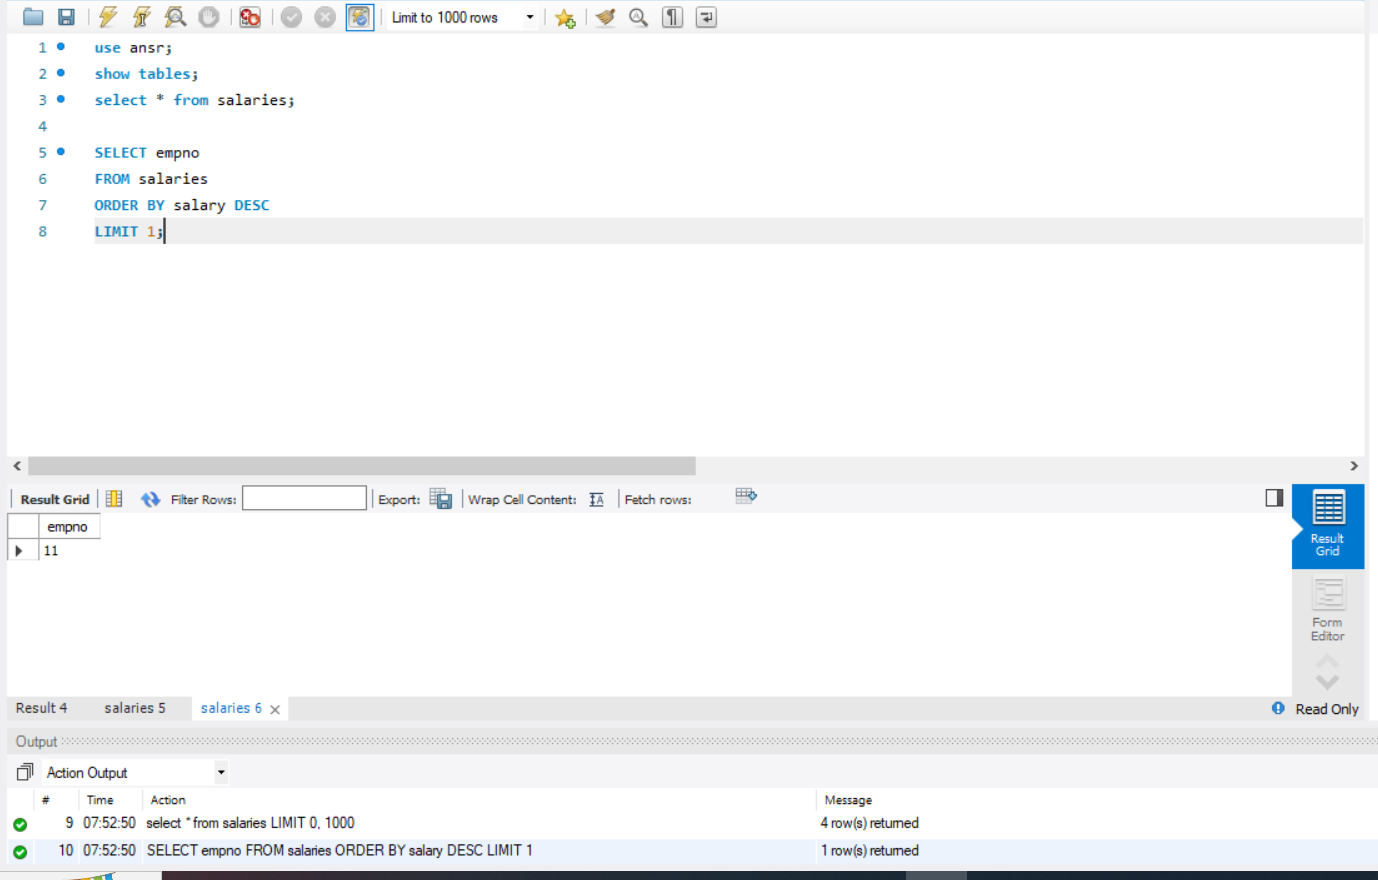

## 3. 
You have a dataset named stock_prices.csv that contains daily stock prices of a company. The dataset has columns date and closing_price. Write a Python script to read the dataset, convert the date column to a datetime object, and then perform a time series analysis by plotting the closing price over time with a rolling 30-day moving average.

Dataset: https://drive.google.com/file/d/1F_LOzrBtu4EAbmb2bx9SufprVDXk0Atm/view?usp=sharing

Submission: Share the Notebook file(.ipynb or .py) or pdf along with code

In [12]:
stock_data = pd.read_csv('stock_prices.csv')
stock_data

,date,closing_price
0,2023-07-01,150.0
1,2023-07-02,152.5
2,2023-07-03,155.2
3,2023-07-04,157.9
4,2023-07-05,159.8
5,2023-07-06,161.3
6,2023-07-07,163.1
7,2023-07-08,165.0
8,2023-07-09,168.2
9,2023-07-10,170.5


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21 non-null     object 
 1   closing_price  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


In [14]:
stock_data.date = pd.to_datetime(stock_data.date) # convert Date data type ('object') to datetime

In [15]:
stock_data = stock_data.set_index("date") # setting date as index

In [16]:
# Calculate the rolling 30-day moving average
stock_data['30-Day MA'] = stock_data['closing_price'].rolling(window=30).mean()

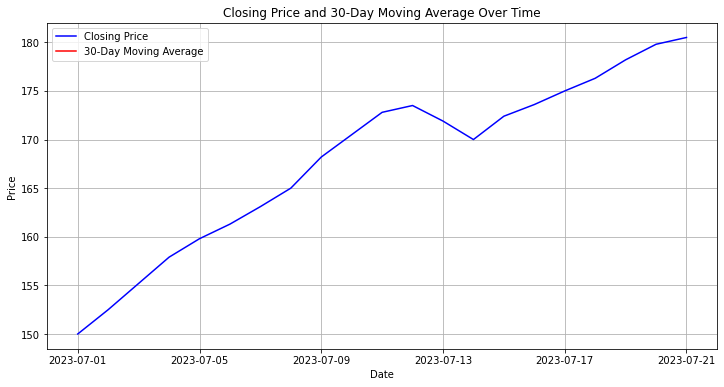

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['closing_price'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['30-Day MA'], label='30-Day Moving Average', color='red')
plt.title('Closing Price and 30-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# since there are only 21 rows in data window of 30 is not possible, so took window as 4
stock_data['30-Day MA'] = stock_data['closing_price'].rolling(window=4).mean()

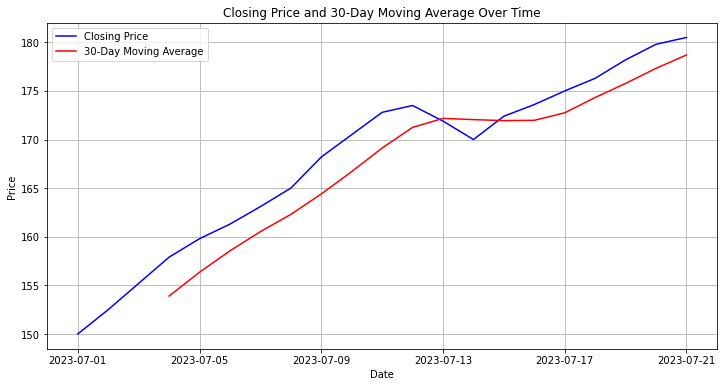

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['closing_price'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['30-Day MA'], label='30-Day Moving Average', color='red')
plt.title('Closing Price and 30-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 4. 
You have a table named user_activity that contains information about user activity on a website. The table has columns user_id, activity_date, and activity_type. The activity_type can be either 'login', 'click', or 'purchase'. Write an SQL query to find the daily engagement rate, which is the percentage of users who performed at least one activity on a given day out of the total number of distinct users on that day. Round the result to two decimal places.

Submission: Share the image along with query or .sql file   

In [1]:
import mysql.connector as conn
mydb = conn.connect(host='localhost',user='root',passwd='0000')
cursor=mydb.cursor()
#cursor.execute('create database ANSR')
cursor.execute('use ANSR')

In [10]:
cursor.execute('create table user_activity(user_id INT(10), activity_date DATE, activity_type VARCHAR(10))')

In [12]:
#Adding values
cursor.execute("insert into user_activity values(1,'2020-08-01','login')")    
cursor.execute("insert into user_activity values(2,'2020-08-01','click')")
cursor.execute("insert into user_activity values(3,'2020-08-01','purchase')")
cursor.execute("insert into user_activity values(4,'2020-08-02','login')")
cursor.execute("insert into user_activity values(5,'2020-08-02','click')")
mydb.commit()

In [2]:
cursor.execute('select * from ansr.user_activity')  
cursor.fetchall()

[(1, datetime.date(2020, 8, 1), 'login'),
 (2, datetime.date(2020, 8, 1), 'click'),
 (3, datetime.date(2020, 8, 1), 'purchase'),
 (4, datetime.date(2020, 8, 2), 'login'),
 (5, datetime.date(2020, 8, 2), 'click'),
 (5, datetime.date(2020, 8, 2), 'login'),
 (5, datetime.date(2020, 8, 2), ''),
 (6, datetime.date(2020, 8, 2), '')]

In [4]:
cursor.execute('''
Select a.user_id,a.activity_type,b.totalcount from user_activity a,
(select count(activity_type) as totalcount, activity_type from user_activity group by activity_type) as b where a.activity_type=b.activity_type;

select activity_date, round((count(distinct case when activity_type is not null then user_id end)*100.0)/ nullif(count(distinct user_id),0),2)
as daily_engagement_rate
from user_activity
group by activity_date
order by activity_date;
''')
cursor.fetchall()

DatabaseError: 2014 (HY000): Commands out of sync; you can't run this command now

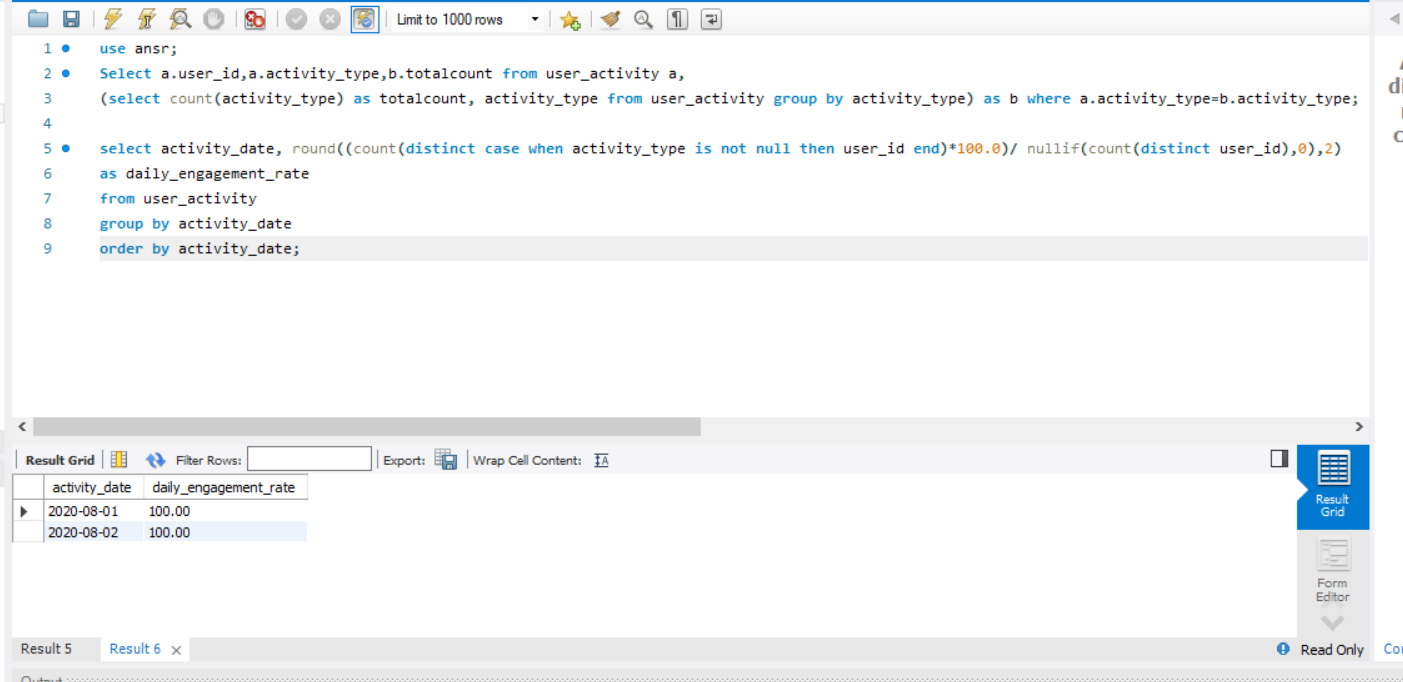

## 5. 
You have a dataset named customer_data.csv that contains information about customers. The dataset has columns customer_id, age, gender, email, and purchases. Write a Python script to read the dataset, perform data cleaning by removing duplicates and handling missing values, and then calculate the average number of purchases for each gender.

Dataset: https://drive.google.com/file/d/17YBlvt8l0S0WQWEhpW7DsuXATe3plgFB/view?usp=sharing

Submission: Share the Notebook file(.ipynb or .py) or pdf along with code

In [5]:
df = pd.read_csv('customer_data.csv')
df

,customer_id,age,gender,email,purchases
0,1001,35,M,abc@example.com,10.0
1,1002,28,F,def@example.com,5.0
2,1003,40,F,ghi@example.com,NaN
3,1004,45,M,jkl@example.com,8.0
4,1005,33,M,mno@example.com,15.0
5,1006,27,F,pqr@example.com,NaN
6,1007,50,M,stu@example.com,12.0
7,1008,29,F,vwx@example.com,7.0
8,1009,38,F,yza@example.com,9.0


In [7]:
df.drop_duplicates(inplace=True)  #Though there arent any duplicates here
df

,customer_id,age,gender,email,purchases
0,1001,35,M,abc@example.com,10.0
1,1002,28,F,def@example.com,5.0
2,1003,40,F,ghi@example.com,NaN
3,1004,45,M,jkl@example.com,8.0
4,1005,33,M,mno@example.com,15.0
5,1006,27,F,pqr@example.com,NaN
6,1007,50,M,stu@example.com,12.0
7,1008,29,F,vwx@example.com,7.0
8,1009,38,F,yza@example.com,9.0


In [9]:
df.purchases.mean()

9.428571428571429

In [12]:
df.groupby('gender').mean()

,customer_id,age,purchases
gender,,,
F,1005.60,32.40,7.00
M,1004.25,40.75,11.25


In [20]:
# Since the data is so less and both the missing values are from same gender I am choosing to drop the NA rows, I usually impute the na but here imputing will make no difference as the avg will remain same.
df.dropna(inplace=True)

In [22]:
len(df)

7

In [23]:
df.groupby('gender').mean()

,customer_id,age,purchases
gender,,,
F,1006.333333,31.666667,7.00
M,1004.250000,40.750000,11.25


## 6. 
You have a table named inventory that contains information about product inventory levels. The table has columns product_id, warehouse_id, date, and quantity. Write an SQL query to find the total quantity of each product in each warehouse for the latest available date.

Submission: Share the image along with query or .sql file    

Note: Submit GitHub File for the solution 

In [4]:
cursor.execute('create table inventory(product_id INT(10),warehouse_id INT(10),date DATE,quantity INT(10))')

In [6]:
#Adding values
cursor.execute("insert into inventory values(1,1,'2020-08-01',10)")    
cursor.execute("insert into inventory values(2,1,'2020-08-02',50)") 
cursor.execute("insert into inventory values(3,2,'2020-08-03',3)")   
cursor.execute("insert into inventory values(4,1,'2020-08-04',40)")   
cursor.execute("insert into inventory values(5,2,'2020-08-05',10)")   
mydb.commit()

In [8]:
cursor.execute("insert into inventory values(1,2,'2020-08-05',10)")   
mydb.commit()

In [9]:
cursor.execute('''
SELECT
    product_id,
    warehouse_id,
    SUM(quantity) AS total_quantity
FROM
    inventory
WHERE
    (product_id, warehouse_id, date) IN (
        SELECT
            product_id,
            warehouse_id,
            MAX(date) AS latest_date
        FROM
            inventory
        GROUP BY
            product_id, warehouse_id
    )
GROUP BY
    product_id, warehouse_id;
    ''')
cursor.fetchall()

[(1, 1, Decimal('10')),
 (2, 1, Decimal('50')),
 (3, 2, Decimal('3')),
 (4, 1, Decimal('40')),
 (5, 2, Decimal('10')),
 (1, 2, Decimal('10'))]

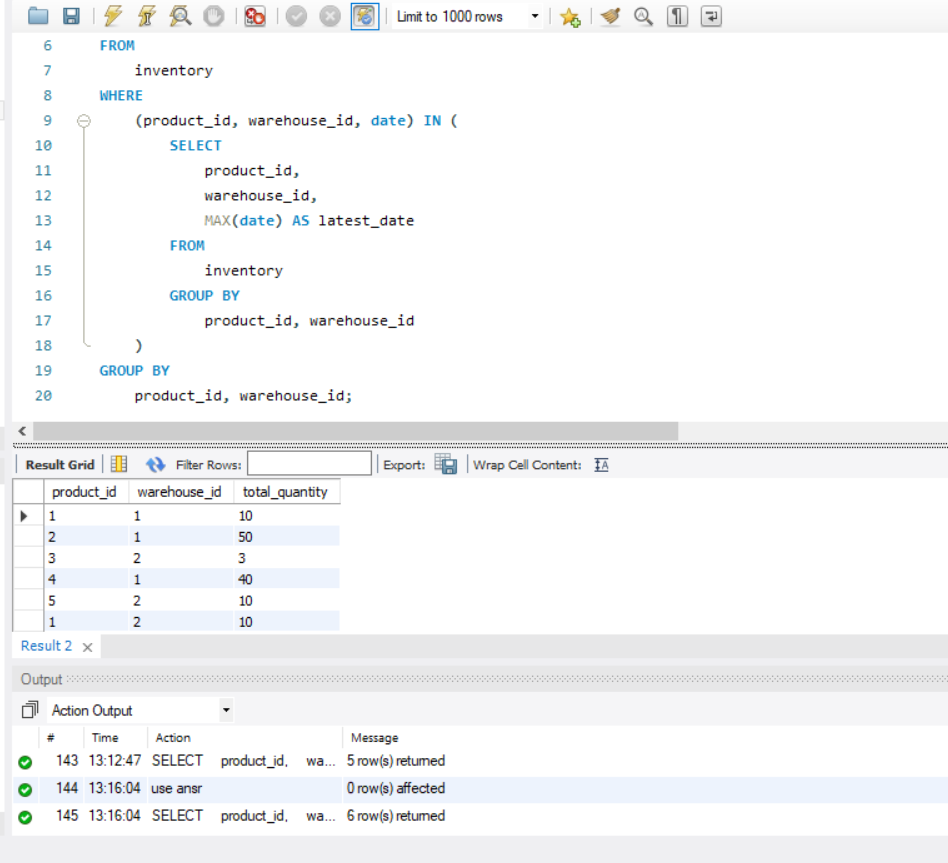

## 7. 
Answer the following questions  using dataset provided below

1. What is the % of sessions with an intention to book a scooter?
 2. What is the % of sessions with a successful booking? 3. What determines, according to you, an intention to book?
4. What are factors, according to you, determining a successful booking? 
5. Do you have any hypotheses after exploring this data? If yes, please add them.  

Dataset: https://drive.google.com/file/d/1MM1vzR0nuAfFH8tIXzs7PJMulZ9Nod22/view?usp=sharing

Submission: Share the Notebook file(.ipynb or .py) or pdf along with code

In [25]:
df = pd.read_csv('mobile_events_2020.csv',delimiter=';') # data explaination is not given inthe question
df  

,anonymous_id,business_zoned,context_app_version,context_device_id,context_os_name,event_name,received_at,created_at
0,9DDC5BCD-0477-4E83-A32A-51013DA0A4E7,Hamburg,3.1.13,7A718FF6-584F-40E2-939D-224231295B1E,iOS,Out-Of-Business Zone View Shown,2020-09-01 23:59:44,2020-09-01 23:59:18
1,5592E78E-CE87-4258-B8D7-DD834A687A1E,Hamburg,3.1.13,11D0CB16-DA38-4565-9C3B-066E7877856C,iOS,Application Opened,2020-09-01 23:59:41,2020-09-01 23:59:35
2,5592E78E-CE87-4258-B8D7-DD834A687A1E,Hamburg,3.1.13,11D0CB16-DA38-4565-9C3B-066E7877856C,iOS,Ride Done - Successful,2020-09-01 23:59:41,2020-09-01 23:59:37
3,5592E78E-CE87-4258-B8D7-DD834A687A1E,Hamburg,3.1.13,11D0CB16-DA38-4565-9C3B-066E7877856C,iOS,Application Opened,2020-09-01 23:59:36,2020-09-01 23:37:46
4,5592E78E-CE87-4258-B8D7-DD834A687A1E,Hamburg,3.1.13,11D0CB16-DA38-4565-9C3B-066E7877856C,iOS,Ride Done - Unsuccessful,2020-09-01 23:59:36,2020-09-01 23:37:52
...,...,...,...,...,...,...,...,...
102417,7C6780F1-B0F4-4525-B008-09591C5DD214,Hamburg,3.1.13,0B5D7461-69F7-436A-8960-B806EEDCA5B4,iOS,Qr Scanner - Enter Number,2020-09-01 00:00:05,2020-08-31 23:59:50
102418,E1F50677-B43A-47DE-88A9-BD5A552B7D9E,Hamburg,3.1.13,0D0FD67D-303A-4CD6-8C8B-8F033204ACED,iOS,Application Opened,2020-09-01 00:00:04,2020-08-31 23:59:59
102419,3569EA33-48C7-4E02-8B22-9E613C40481C,Hamburg,3.1.13,0CBB29F5-548F-4A88-B4A3-0284FC03F1FD,iOS,Qr Scanner - Cancel,2020-09-01 00:00:03,2020-08-31 23:59:55
102420,46f981e2-d66d-43da-922d-38f4c14d02dd,Hamburg,3.1.9,46f981e2-d66d-43da-922d-38f4c14d02dd,Android,Scooter Selected - Auto,2020-09-01 00:00:03,2020-08-31 23:59:41


In [28]:
df.event_name.unique()

array(['Out-Of-Business Zone View Shown', 'Application Opened',
       'Ride Done - Successful', 'Ride Done - Unsuccessful',
       'Reduced Speed Snackbar Shown - Out Of Business Zone',
       'Vehicle Selected - User', 'Vehicle Selected - Auto',
       'Qr Scanner Tapped', 'Qr Scanner - Scanned Succeeded',
       'Ride Started - Pre-Ride', 'Ride Started - Successful',
       'Application Updated', 'Scooter Selected - User',
       'Scooter Selected - Auto',
       'Qr Scanner - Scan Failed - Vehicle Not Available',
       'Paypal Added Successfully', 'List Of Payment Shown',
       'Payment Method Chosen', 'Personal Details Added Succeeded',
       'Payment Method Screen Opened', 'Phone Number Entered',
       'Terms And Privacy Policy Accepted', 'Qr Scanner - Enter Number',
       'Ride Started - Unsuccessful', 'Add Payment Method',
       'Sidebar Opened', 'Redeem Code', 'Play Sound From Vehicle',
       'Map Legend Clicked', 'Rating Screen Closed - Maybe Later',
       'Payment De

In [36]:
df.info() #no na values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102422 entries, 0 to 102421
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anonymous_id         102422 non-null  object
 1   business_zoned       102422 non-null  object
 2   context_app_version  102422 non-null  object
 3   context_device_id    102422 non-null  object
 4   context_os_name      102422 non-null  object
 5   event_name           102422 non-null  object
 6   received_at          102422 non-null  object
 7   created_at           102422 non-null  object
dtypes: object(8)
memory usage: 6.3+ MB


In [29]:
df.describe()

,anonymous_id,business_zoned,context_app_version,context_device_id,context_os_name,event_name,received_at,created_at
count,102422,102422,102422,102422,102422,102422,102422,102422
unique,8629,1,9,8682,2,61,32612,51060
top,64C9AEA7-087E-4457-9597-2E8DF2D3BC75,Hamburg,3.1.13,6F9DAD30-EF9A-4F66-835F-75EC4CDD28EB,iOS,Application Opened,2020-09-01 11:21:10,2020-09-01 14:19:58
freq,201,102422,69625,201,72873,26047,91,12


In [11]:
scooter=['Vehicle Selected - User','Ride Done - Successful', 'Scooter Selected - User','Scooter Selected - Auto','Qr Scanner - Scan Failed - Scooter Not Available']
len(scooter)

5

In [34]:
df.groupby('event_name').count()['anonymous_id']

event_name
Account Setup Opened                   287
Add Payment Method                     290
Application Opened                   26047
Application Updated                   1973
Credit Card Details Accepted           355
                                     ...  
Signup Completed                       267
Signup Started                         523
Terms And Privacy Policy Accepted     1058
Vehicle Selected - Auto               2092
Vehicle Selected - User               2525
Name: anonymous_id, Length: 61, dtype: int64

In [37]:
# Since no information is given about the source of this data I am leaving this question here

## 8. 
You have been given a dataset named CarSalesData.csv, which contains information about car sales transactions. Your task is to create an interactive dashboard using Power BI to visualize and analyze the car sales data.

Dataset: https://docs.google.com/spreadsheets/d/1JUsF4jMTwfp0q4a3aZN8vYAYBd77t5I-/edit?usp=sharing&ouid=108907592976152953143&rtpof=true&sd=true

Submission: Share the .PBIX File or PDF along with analysis report

In [38]:
#carsalesdata.PBIX file is shared

## 9. 
A data analyst wants to determine if there is a significant difference in the average sales between two different marketing strategies, A and B. Which statistical test should the analyst use?

Option: T-test

## 10.
A data analyst wants to understand the relationship between the dependent variable (sales) and multiple independent variables (advertising spend, price, and promotions). Which statistical method should the analyst use to achieve this?

Option: Linear Regression

## 11.
A data analyst has built a predictive model to forecast customer churn based on historical data. What evaluation metric should the analyst use to measure the performance of the model?

Option: F1 score    #but if it is predicting the % chances of a customer churn than we could use MSE or R square

## 12. 
You have an Excel worksheet named "SalesData" with columns "Product", "Quantity", and "Price". Write a VBA macro to calculate the total revenue for each product (Quantity multiplied by Price) and display the results in a new column named "Total Revenue" next to the existing data.

Dataset: https://docs.google.com/spreadsheets/d/1ANwZS14dny3oXdo_xF2PEHzZBE0UTYAz/edit?usp=sharing&ouid=108907592976152953143&rtpof=true&sd=true

Submission: Share the Excel File

### Excel sheet shared with name: SaleData1.xlsm

Sub CalculateTotalRevenue()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim quantityColumn As Long
    Dim priceColumn As Long
    Dim totalRevenueColumn As Long
    Dim i As Long
    
 
    Set ws = ThisWorkbook.Sheets("Sheet1")
    
   
    quantityColumn = 2
    priceColumn = 3
    totalRevenueColumn = 4
    
  
    lastRow = ws.Cells(ws.Rows.Count, quantityColumn).End(xlUp).Row
    
   
    ws.Cells(1, totalRevenueColumn).Value = "Total Revenue"
    
  
    For i = 2 To lastRow
        ws.Cells(i, totalRevenueColumn).Formula = "=" & ws.Cells(i, quantityColumn).Address & "*" & ws.Cells(i, priceColumn).Address
    Next i
End Sub

## 13. 
Which of the following tasks can be recorded as a macro in Excel?

## 14. 
As a data analyst, how do you ensure data integrity and consistency when integrating data from multiple sources into a centralized database or data warehouse? Provide specific steps or best practices you would follow.

## 15.  
Describe a data project you worked on recently

Note: You can attach github link or drive link for your project

In my recent project I have scrapped data from 125 sites and after cleaning/ preprocessing those scrapped articles, I applied NLP for sentiment analysis. I another project predicted customer churn and also deployed that on AWS beanstalk with CI/CD pipeline. I am attaching the Github link here.

https://github.com/muditarora1/CustomerChurn